In [6]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
!unzip dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
     

In [9]:
from datasets import load_dataset
dataset=load_dataset(data_dir=r"C:\Users\user\Desktop\model\train")

ModuleNotFoundError: No module named 'datasets'

In [23]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)
     

17225924/17225924 [==============================] - 37s 2us/step


In [24]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )
     

In [28]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= r"C:\Users\user\Desktop\model\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices
     

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [33]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= r"C:\Users\user\Desktop\model\train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )


Found 350 images belonging to 7 classes.


In [34]:
t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break
    plotImages(t_img, label)

In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [36]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])
     

C:\Users\user\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 10.2760 - accuracy: 0.2075
Epoch 1: val_accuracy improved from -inf to 0.52344, saving model to best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 10.2760 - accuracy: 0.2075 - val_loss: 3.8044 - val_accuracy: 0.5234
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.9587 - accuracy: 0.5409
Epoch 2: val_accuracy improved from 0.52344 to 0.63281, saving model to best_model.h5
10/10 [==============================] - 9s 924ms/step - loss: 3.9587 - accuracy: 0.5409 - val_loss: 3.7739 - val_accuracy: 0.6328
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.7622 - accuracy: 0.6635
Epoch 3: val_accuracy improved from 0.63281 to 0.71875, saving model to best_model.h5
10/10 [==============================] - 9s 954ms/step - loss: 2.7622 - accuracy: 0.6635 - val_loss: 1.7830 - val_accuracy: 0.7188
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.

In [38]:
from keras.models import load_model
model = load_model(r"C:\Users\user\Desktop\model\best_model.h5")
     

In [39]:
h =  hist.history
h.keys()
     

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

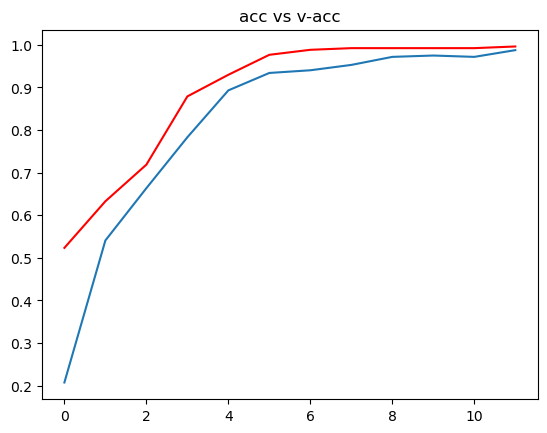

In [40]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()


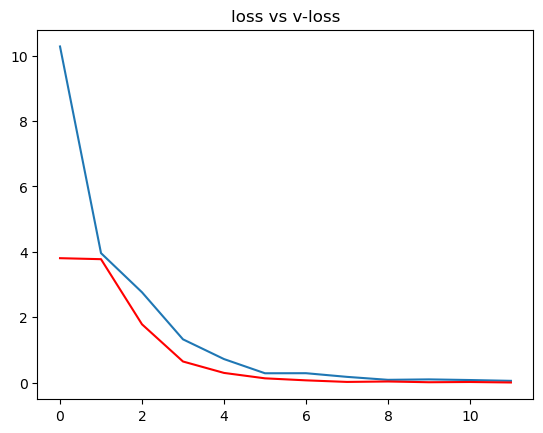

In [41]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()
     


In [42]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
     


1/1 [==============================] - 1s 628ms/step
 the image is of Angry


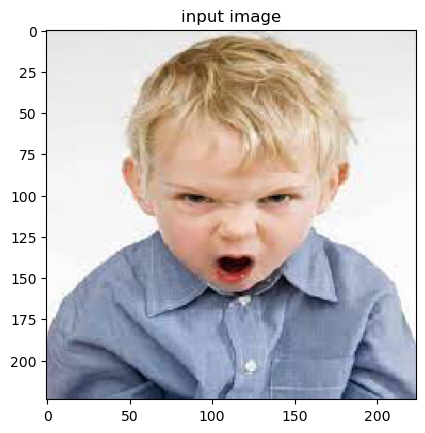

In [44]:
path = r"C:\Users\user\Desktop\model\train\Angry\download (2).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()